Script for performing Multi-Crteria Decision Making analysis to evaluate the huts. Steps:
1. Create the 'alternatives' dataframe by aggregating information on the various criteria (water, energy, etc.)
    
    1.1 convert qualitative data in quantittive using a scoring system

2. perform MCDM analysis with ‘pymcdm` library (compare different methods)

In [219]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [220]:
def standardize_name(name):
    ''' converts names to lowercase, strips leading and trailing whitespace, 
    and removes non-alphanumeric characters.
    '''
    return ''.join(e for e in name.lower().strip() if e.isalnum())

# Create geodataframe

In [221]:
huts_points = gpd.read_file('../data/huts/huts_points.geojson')
huts_points = huts_points.to_crs(epsg=32632) # convert to UTM32N [m] for analysis
huts_points

,standard_name,nome_strut,categoria_CAISAT,categoria_PAT,posti_letto,quota,geometry
0,alpepozzavlancia,"ALPE POZZA ""VINCENZO LANCIA""",C,Alp,50,1802,POINT (666584.351 5077095.37)
1,altissimodchiesa,"ALTISSIMO ""DAMIANO CHIESA""",C,Alp,35,2060,POINT (646874.183 5074717.942)
2,antermoia,ANTERMOIA,D,Alp,61,2496,POINT (704489 5150499)
3,bindesipprati,"BINDESI ""PINO PRATI""",A,Escurs,0,618,POINT (666672.806 5100323.693)
4,boccaditratnpernici,"BOCCA DI TRAT ""NINO PERNICI""",C,Alp,28,1601,POINT (637133 5087416)
5,boè,BOE',D,Alp,80,2871,POINT (716585.416 5155102.852)
6,carèaltodongari,"CARE' ALTO ""DANTE ONGARI""",D,Alp,74,2450,POINT (625663.479 5107292.054)
7,casarotalciola,CASAROTA,C,Alp,32,1569,POINT (670144.42 5091330.693)
8,cevedaleglarcher,"CEVEDALE ""GUIDO LARCHER""",D,Alp,88,2607,POINT (627983.759 5143939.751)
9,ciampediè,CIAMPEDIE',B,Alp,25,1993,POINT (704674.062 5145698.588)


## Water criteria

In [222]:
appr_idrico = pd.read_csv('../data/water/sat_appr_idrico.csv')
appr_idrico.head(5)

,rifugio,acquedotto,sorgente,sorgente_potabile,superficiale,possibile_potabilizzatore,cisterna_m3,recupero_piovana,ingresso,recupero_grigie,consumo_bott_15,consumo_bott_05,lamp_uv,note
0,"Alpe Pozza - ""V.Lancia""",0,1,0,0,1,30+10,-999,caduta,-999,150,200,SI,NaN
1,"Altissimo - ""D.Chiesa""",0,1,0,0,0,30,60,pompa,-999,2000,2500,SI,Progetto lavori su presa pompa
2,Antermoia,0,0,0,torr-lago,1,10+8,-999,pompa,-999,2550,700,SI,NaN
3,"Bindesi - ""P.Prati""",1,0,0,0,0,-999,-999,-999,-999,-999,450,NO,NaN
4,"Bocca di Trat - ""N.Pernici""",0,1,0,0,1,10+10,-999,caduta,-999,-999,1300,SI,"Progetto nuove cisterne, da finanziare"


In [223]:
# Replace -999 with NaN
appr_idrico.replace(-999, np.nan, inplace=True)
appr_idrico.replace('-999', np.nan, inplace=True)
# Standardize names
appr_idrico['standard_name'] = appr_idrico['rifugio'].apply(standardize_name)
appr_idrico.head(5)

,rifugio,acquedotto,sorgente,sorgente_potabile,superficiale,possibile_potabilizzatore,cisterna_m3,recupero_piovana,ingresso,recupero_grigie,consumo_bott_15,consumo_bott_05,lamp_uv,note,standard_name
0,"Alpe Pozza - ""V.Lancia""",0.0,1.0,0.0,0,1.0,30+10,NaN,caduta,NaN,150.0,200.0,SI,NaN,alpepozzavlancia
1,"Altissimo - ""D.Chiesa""",0.0,1.0,0.0,0,0.0,30,60,pompa,NaN,2000.0,2500.0,SI,Progetto lavori su presa pompa,altissimodchiesa
2,Antermoia,0.0,0.0,0.0,torr-lago,1.0,10+8,NaN,pompa,NaN,2550.0,700.0,SI,NaN,antermoia
3,"Bindesi - ""P.Prati""",1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,450.0,NO,NaN,bindesipprati
4,"Bocca di Trat - ""N.Pernici""",0.0,1.0,0.0,0,1.0,10+10,NaN,caduta,NaN,NaN,1300.0,SI,"Progetto nuove cisterne, da finanziare",boccaditratnpernici


WT02. TYPE OF SOURCE

In [224]:
# Merge huts_points with appr_idrico 
merged_df = huts_points.merge(appr_idrico[['standard_name', 'acquedotto', 'sorgente', 'superficiale', 'cisterna_m3']], on='standard_name', how='left')

# Define the function to create the WT01 column
def determine_wt01(row):
    if row['acquedotto'] == 1:
        return 'aqueduct'
    elif row['sorgente'] == 1:
        return 'spring'
    elif pd.notna(row['superficiale']):
        if row['superficiale'] == '0':
            return 'nosource'
        return row['superficiale']
    else:
        return np.nan

# Apply the function to create the WT01 column
merged_df['WT01'] = merged_df.apply(determine_wt01, axis=1)

# Create the new DataFrame with the desired columns
new_df = merged_df[['standard_name', 'WT01']]
new_df.WT01.value_counts()


WT01
spring       9
aqueduct     6
fusione      6
torr-rio     5
torr-lago    2
lago         2
misto        1
lago-torr    1
nosource     1
Name: count, dtype: int64

WT03. WATER STORAGE CAPACITY [m3]

In [225]:
def process_cisterna_m3(value):
    try:
        if isinstance(value, str)and '+' in value:
            # split the value by '+' and convert to integers, then sum them
            return sum(map(int, value.split('+')))
        else:
            # convert the value to a float
            return float(value)
    except ValueError:
        # if conversion fails, return NaN
        return np.nan

merged_df['WT03'] = merged_df['cisterna_m3'].apply(process_cisterna_m3)

In [226]:
merged_df

,standard_name,nome_strut,categoria_CAISAT,categoria_PAT,posti_letto,quota,geometry,acquedotto,sorgente,superficiale,cisterna_m3,WT01,WT03
0,alpepozzavlancia,"ALPE POZZA ""VINCENZO LANCIA""",C,Alp,50,1802,POINT (666584.351 5077095.37),0.0,1.0,0,30+10,spring,40.0
1,altissimodchiesa,"ALTISSIMO ""DAMIANO CHIESA""",C,Alp,35,2060,POINT (646874.183 5074717.942),0.0,1.0,0,30,spring,30.0
2,antermoia,ANTERMOIA,D,Alp,61,2496,POINT (704489 5150499),0.0,0.0,torr-lago,10+8,torr-lago,18.0
3,bindesipprati,"BINDESI ""PINO PRATI""",A,Escurs,0,618,POINT (666672.806 5100323.693),1.0,0.0,0,NaN,aqueduct,NaN
4,boccaditratnpernici,"BOCCA DI TRAT ""NINO PERNICI""",C,Alp,28,1601,POINT (637133 5087416),0.0,1.0,0,10+10,spring,20.0
5,boè,BOE',D,Alp,80,2871,POINT (716585.416 5155102.852),0.0,0.0,misto,100,misto,100.0
6,carèaltodongari,"CARE' ALTO ""DANTE ONGARI""",D,Alp,74,2450,POINT (625663.479 5107292.054),0.0,0.0,torr-rio,2,torr-rio,2.0
7,casarotalciola,CASAROTA,C,Alp,32,1569,POINT (670144.42 5091330.693),0.0,1.0,0,20,spring,20.0
8,cevedaleglarcher,"CEVEDALE ""GUIDO LARCHER""",D,Alp,88,2607,POINT (627983.759 5143939.751),0.0,0.0,torr-rio,30,torr-rio,30.0
9,ciampediè,CIAMPEDIE',B,Alp,25,1993,POINT (704674.062 5145698.588),1.0,0.0,0,NaN,aqueduct,NaN


In [227]:
# delete sorgente, acquedotto, superficiale, cisterna_m3 columns ? oppure tengo tutto fino alla fine e poi creo 
# alternatives_gdf selezionando solo le colonne che mi servono (nome, info e criteri codificati)?

## Energy & electricity

In [228]:
appr_energia = pd.read_csv('../data/sat_appr_energetico.csv')
appr_energia.head(5)

,rifugio,categoria_CAISAT,categoria_PAT,quota,posti_letto,cogeneratore,generatore,potenza_gruppoel_kw,riserva,fotovoltaico,potenza_fotov_kw,accumulo_fotov_V,accumulo_fotov_ah,idroelettrico,potenza_idro_kw,rete_elettrica,gas_gpl,solare_termico,riscaldamento,note
0,"Alpe Pozza - ""V.Lancia""",C,Alp,1.802,50,0,1,40,1,1,1.8,24,1500,0,0,0,1,0,gasolio,NaN
1,"Altissimo - ""D.Chiesa""",C,Alp,2.060,35,0,1,20,1,1,2.5,48,1000,0,0,0,1,0,-999,NaN
2,Antermoia,D,Alp,2.496,61,1,0,60,1,1,1.4,24,1580,0,0,0,1,0,gasolio,NaN
3,"Bindesi - ""P.Prati""",A,Escurs.,611.000,0,0,0,0,0,0,0.0,0,0,0,0,1,1,0,-999,NaN
4,"Bocca di Trat - ""N.Pernici""",C,Alp,1.600,28,0,1,40,1,1,1.2,24,1200,0,0,0,1,0,-999,NaN


In [229]:
# Replace -999 with NaN
appr_energia.replace(-999, np.nan, inplace=True)
appr_energia.replace('-999', np.nan, inplace=True)
# Standardize names
appr_energia['standard_name'] = appr_energia['rifugio'].apply(standardize_name)

In [230]:
appr_energia.columns

Index(['rifugio', 'categoria_CAISAT', 'categoria_PAT', 'quota', 'posti_letto',
       'cogeneratore', 'generatore', 'potenza_gruppoel_kw', 'riserva',
       'fotovoltaico', 'potenza_fotov_kw', 'accumulo_fotov_V',
       'accumulo_fotov_ah', 'idroelettrico', 'potenza_idro_kw',
       'rete_elettrica', 'gas_gpl', 'solare_termico', 'riscaldamento', 'note',
       'standard_name'],
      dtype='object')

EN02. TYPE OF SOURCE

In [231]:
# Merge with appr_energia
merged_df = merged_df.merge(appr_energia[['standard_name', 'cogeneratore', 'generatore', 'potenza_gruppoel_kw', 'riserva',
       'fotovoltaico', 'potenza_fotov_kw', 'accumulo_fotov_V',
       'accumulo_fotov_ah', 'idroelettrico', 'potenza_idro_kw',
       'rete_elettrica', 'gas_gpl', 'solare_termico', 'riscaldamento']], 
       on='standard_name', how='left')

def determine_en02(row):
    res = []
    if row['cogeneratore'] == 1:
        res.append('cogenerator')
    if row['generatore'] == 1:
        res.append('generator')
    if row['fotovoltaico'] == 1:
        res.append('photovoltaic')
    if row['idroelettrico'] == 1:
        res.append('hydroelectric')
    if row['rete_elettrica'] == 1:
        res.append('electric_grid')
    if row['gas_gpl'] == 1:
        res.append('gas')
    if row['solare_termico'] == 1:
        res.append('solar_thermal')
    if res == []:
        return np.nan
    else:
        print(row['standard_name'], res)
        return res

# Apply the function to create the column
merged_df['EN02'] = merged_df.apply(determine_en02, axis=1)

alpepozzavlancia ['generator', 'photovoltaic', 'gas']
altissimodchiesa ['generator', 'photovoltaic', 'gas']
antermoia ['cogenerator', 'photovoltaic', 'gas']
bindesipprati ['electric_grid', 'gas']
boccaditratnpernici ['generator', 'photovoltaic', 'gas']
boè ['electric_grid', 'gas', 'solar_thermal']
carèaltodongari ['hydroelectric']
casarotalciola ['generator', 'photovoltaic', 'gas']
cevedaleglarcher ['cogenerator', 'gas']
ciampediè ['electric_grid', 'gas']
cimadastaobrentari ['hydroelectric', 'gas']
fftucketteqsella ['cogenerator', 'photovoltaic', 'gas']
finonchiofllifilzi ['electric_grid', 'gas']
grostèggraffer ['electric_grid', 'gas']
mandroncittàditrento ['hydroelectric', 'gas']
montecalinosanpietro ['electric_grid', 'gas', 'solar_thermal']
monzonittaramelli ['hydroelectric', 'gas']
paludei ['electric_grid', 'gas']
peller ['cogenerator', 'photovoltaic', 'gas', 'solar_thermal']
rodadivael ['cogenerator', 'photovoltaic', 'gas']
rosettagpedrotti ['cogenerator', 'gas']
saentsdorigoni ['h

In [232]:
merged_df.EN02.value_counts()

EN02
[generator, photovoltaic, gas]                     6
[electric_grid, gas]                               6
[hydroelectric, gas]                               6
[cogenerator, gas]                                 4
[cogenerator, photovoltaic, gas]                   3
[electric_grid, gas, solar_thermal]                2
[hydroelectric]                                    2
[cogenerator, photovoltaic, gas, solar_thermal]    1
[photovoltaic, hydroelectric, gas]                 1
[generator, photovoltaic, gas, solar_thermal]      1
Name: count, dtype: int64

In [233]:
merged_df.dtypes

standard_name            object
nome_strut               object
categoria_CAISAT         object
categoria_PAT            object
posti_letto               int32
quota                     int32
geometry               geometry
acquedotto              float64
sorgente                float64
superficiale             object
cisterna_m3              object
WT01                     object
WT03                    float64
cogeneratore            float64
generatore              float64
potenza_gruppoel_kw      object
riserva                 float64
fotovoltaico            float64
potenza_fotov_kw        float64
accumulo_fotov_V        float64
accumulo_fotov_ah       float64
idroelettrico           float64
potenza_idro_kw         float64
rete_elettrica          float64
gas_gpl                 float64
solare_termico          float64
riscaldamento            object
EN02                     object
dtype: object

EN03. POWER STORAGE CAPACITY

In [234]:
# Sum of kw from all sources
# Note: potenza_gruppoel_kw is of type object because it has sums 
def determine_en03(row):
    res = 0
    for col in ['potenza_gruppoel_kw', 'potenza_fotov_kw', 'potenza_idro_kw']:
        try:
            if isinstance(row[col], str) and '+' in row[col]:
                # split the value by '+' and convert to integers, then sum them
                res += sum(map(int, row[col].split('+')))
            else:
                # convert the value to a float
                res += float(row[col])
        except ValueError:
            return np.nan

    return res

merged_df['EN03'] = merged_df.apply(determine_en03, axis=1)

In [235]:
merged_df.EN03.value_counts()
# the ones at 0 are the 8 connected to public electricity

EN03
0.0      8
40.0     3
61.4     2
80.0     2
8.0      2
25.0     2
41.8     1
22.5     1
7.0      1
21.0     1
41.2     1
6.0      1
120.0    1
26.5     1
43.2     1
29.2     1
840.0    1
30.0     1
21.3     1
Name: count, dtype: int64

EN04. HEATING

In [236]:
merged_df['EN04'] = merged_df['riscaldamento']

## Goods aerialways
Load the goods_aerialways gdf (Multilinestrings) and for each hut check if an aerialway arrives within a 500m radius.

In [237]:
goods_aerialways = gpd.read_file('../data/others/goods_aerialways.geojson')
goods_aerialways = goods_aerialways.to_crs(merged_df.crs)

/Users/sarategoni/Documents/tesi_rifugi/alpinehutsustainability/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 121064777 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [238]:
# Buffer the huts points by 500 meters
merged_df['buffer'] = merged_df.geometry.buffer(500)

# Check for intersections between the buffered huts and the aerialways
merged_df['aerialway_within_500m'] = merged_df['buffer'].apply(
    lambda hut_buffer: goods_aerialways.intersects(hut_buffer).any()
)
merged_df = merged_df.drop(columns=['buffer'])

# Values of the new column
merged_df.aerialway_within_500m.value_counts()

aerialway_within_500m
False    18
True     15
Name: count, dtype: int64

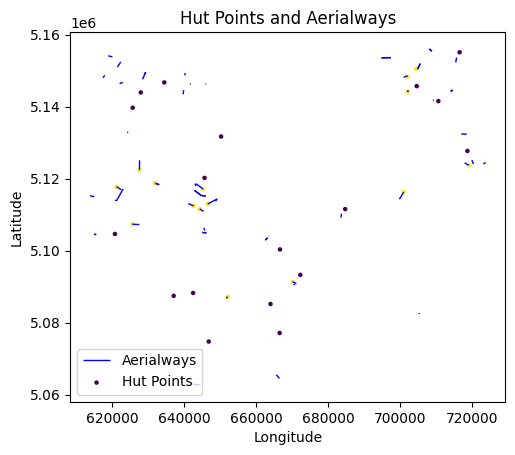

In [239]:
# Plot the hut points and aerialways
fig, ax = plt.subplots()

goods_aerialways.plot(ax=ax, color='blue', linewidth=1, label='Aerialways')
merged_df.plot(ax=ax, c=merged_df['aerialway_within_500m'], markersize=5, label='Hut Points')

plt.legend()
plt.title('Hut Points and Aerialways')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## People aerialways
Same logic can be used for lifts for people, maybe with a wider radius (e.g. 1km)
From looking in QGIS: there are 3 types of geometries (point, linestring and polygon). Points and polygons are the stations. However, not all lifts have a marked station, so for analysis it may be better to use the linestring (as done with goods aerialways).

In [240]:
lifts_aerialways = gpd.read_file('../data/others/lifts_aerialways.geojson')
lifts_aerialways = lifts_aerialways.to_crs(merged_df.crs)

/Users/sarategoni/Documents/tesi_rifugi/alpinehutsustainability/venv/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 224065487 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [241]:
# Buffer the huts points by 500 meters
merged_df['buffer'] = merged_df.geometry.buffer(700)

# Use only the LineString geometries
lifts_aerialways_linestring = lifts_aerialways[lifts_aerialways.geometry.type == 'LineString']

# Check for intersections between the buffered huts and the aerialways
merged_df['lift_within_700m'] = merged_df['buffer'].apply(
    lambda hut_buffer: lifts_aerialways_linestring.intersects(hut_buffer).any()
)
merged_df = merged_df.drop(columns=['buffer'])

# Values of the new column
merged_df.lift_within_700m.value_counts()

lift_within_700m
False    30
True      3
Name: count, dtype: int64

In [242]:
merged_df[merged_df['lift_within_700m'] == True]

,standard_name,nome_strut,categoria_CAISAT,categoria_PAT,posti_letto,quota,geometry,acquedotto,sorgente,superficiale,...,potenza_idro_kw,rete_elettrica,gas_gpl,solare_termico,riscaldamento,EN02,EN03,EN04,aerialway_within_500m,lift_within_700m
9,ciampediè,CIAMPEDIE',B,Alp,25,1993,POINT (704674.062 5145698.588),1.0,0.0,0,...,0.0,1.0,1.0,0.0,NaN,"[electric_grid, gas]",0.0,NaN,False,True
13,grostèggraffer,GIORGIO GRAFFER AL GROSTE',C,Alp,70,2261,POINT (645717.304 5120189.926),0.0,1.0,0,...,0.0,1.0,1.0,0.0,gasolio,"[electric_grid, gas]",0.0,gasolio,False,True
20,rosettagpedrotti,"ROSETTA ""GIOVANNI PEDROTTI""",C,Alp,78,2578,POINT (718762.299 5127676.973),0.0,0.0,fusione,...,0.0,0.0,1.0,0.0,elettrico,"[cogenerator, gas]",40.0,elettrico,False,True


This is a good criteria, but I can dive deeper and add the trails network to check if there are short paths connecting the arrival of the lift to huts (e.g. Rifugio Vioz is marked as the hardest category 'E', but there is the Pejo3000 cable car that significantly reduces the difficulty). Similar for Boè

...in progress..